Tugas Hari Senin 


Nama : Maulana Achsan 
Batch : RMT 

Tugas ini untuk menambah skill tentang ML dan Linear regression 


In [193]:
# Importing libraries yang dibutuhkan 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

## Data Loading

In [194]:
df = pd.read_csv(r"C:\Users\asanm\Hacktiv8\fase2\W1\Senin\lat_sendiri_senin\insurance.csv")
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
583,32,female,23.650,1,no,southeast,17626.23951
522,51,female,33.915,0,no,northeast,9866.30485
673,41,female,31.020,0,no,southeast,6185.32080
417,36,female,22.600,2,yes,southwest,18608.26200
980,54,male,25.460,1,no,northeast,25517.11363
1217,29,male,37.290,2,no,southeast,4058.11610
504,38,female,28.930,1,no,southeast,5974.38470
702,53,male,41.470,0,no,southeast,9504.31030
652,48,female,31.130,0,no,southeast,8280.62270
1151,58,female,36.480,0,no,northwest,12235.83920


Dari data ini terlihat berisi 7 kolom dan berisi kolom contoh seperti umur kelamin dan BMI (body mass index) > kemungkinan dan informasi lainyang tertera. Dari sample ini cukup bersih dan tidak ada duplikasi sepertinya namun perlu di gali lebih dalam karena hanya sampel dari 10 data. 

In [195]:
# pembuatan copy siapa tau data ilang 
df2 = df.copy()

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data terdiri dari 7 kolom dan 4 type data numerik dan type data kategorik. dilihat dari data type nya seperti nya sudah okay semua

In [197]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Pada kolom usia memiliki rata-rata 39 tahun dan deviasi yang cukup tinggi namun range nya sekitar 46. 
pada kolom bmi rata-rata 30 dan std 6 mtitik tengah di 30 berarti kemungkinan ini normal dan 68% data terpusat di titik 30 +- std. 
rata rata anak 1 
untuk kolom charges range nya yaitu 62 ribuan dan rata2 itu 13200 an namun ini kita tidak diberi tahu apakah ini range per tahun apa per month

## Exploratory data analysis 

Membuat rumus untuk melihat bentuk datanya kira kira seperti apa sehingga kita bisa tau gambaran data semua secara sekilas. Ini cenderung memakai boxplot bisa pakai histogram dsb

In [198]:
def plot_all_boxplots(df):
    """
    Membuat boxplot untuk setiap kolom numerik dalam DataFrame."""
    # Pilih hanya kolom numerik
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Tentukan ukuran figure
    plt.figure(figsize=(5, 5))
    
    # Loop melalui setiap kolom numerik dan buat boxplot
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(1,len(numeric_cols), i)
        plt.boxplot(df[col].dropna(), vert=True)
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
    
    # Sesuaikan layout agar tidak tumpang tindih
    plt.tight_layout()
    
    # Tampilkan plot
    plt.show()

# Contoh penggunaan:
# df = pd.read_csv('your_data.csv')
# plot_all_boxplots(df)


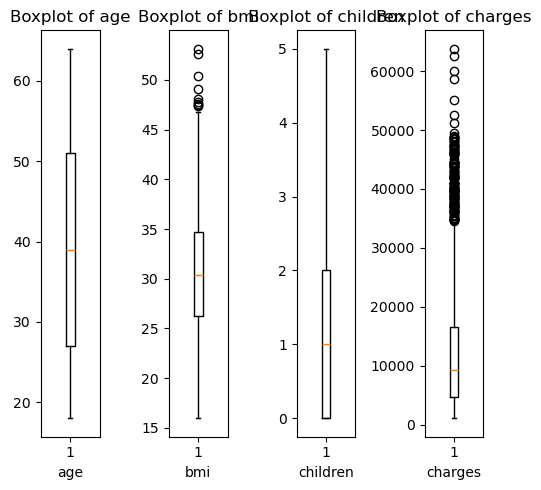

In [199]:
plot_all_boxplots(df)

Untuk data age dan children tidak ada outliernya. namun pada data bmi dan charges masih terdapat outlier yang mana (apakah ini perlu dihandle kita lihat nanti)
terlihat juga pada charges itu menghitam bulatannyha itu menandakan data banyak sekali outlier di titik2 itu 

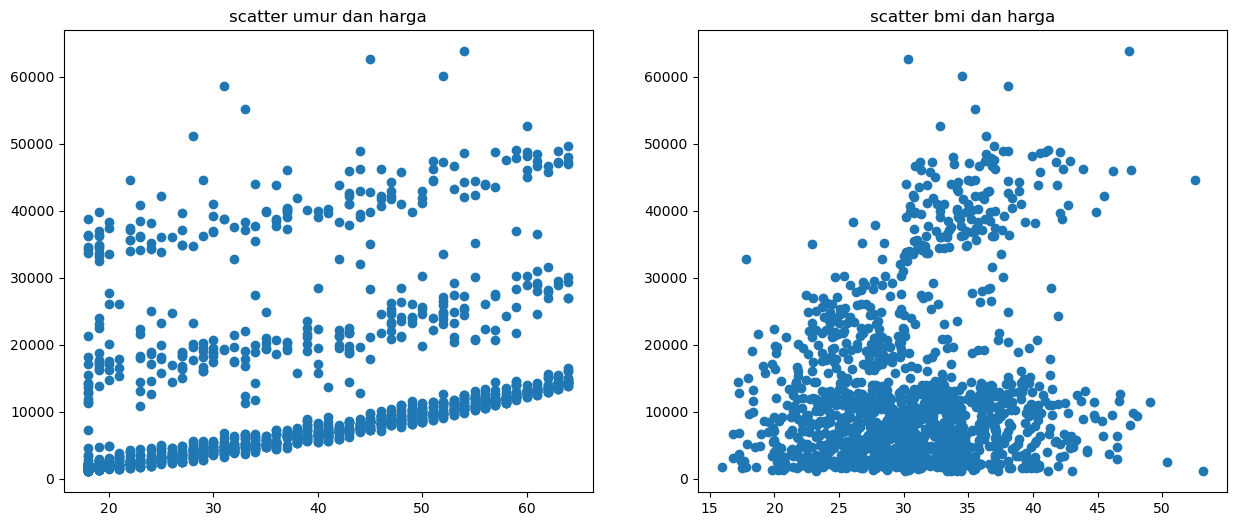

In [200]:
plt.figure (figsize= (15,6))
plt.subplot(1,2,1)
plt.scatter (x= df['age'], y= df['charges'])
plt.title ('scatter umur dan harga')


plt.subplot(1,2,2)
plt.scatter(x= df['bmi'], y = df['charges'])
plt.title ('scatter bmi dan harga')

plt.show()

ada kecenderungan korelasi postif pada haraga dan umur. semakin umur tinggi maka harga juga akan naik. ini seperti resiko terjadinya penyakit. semakin tua seseorang maka kemungkinan orang tersebut mendapatkan penyakit semakin tinggi. 
pada scatter bmi dan harga ini menunjukkan randomnya data, data ini cenderung tidak berkorelasi antara bmi dan harga. meskipun ada indikasi positif namun titik dibawah cenderung banyak. 

### Menjawab Soal 

1. Overweight kelas 1 30<= BMI < 35
2. Overweight kelas 2 35<= BMI < 40 
3. Overweight kelas 3 BMI >= 40 
4. Tidak OW  BMI <30

In [201]:
# Eda Non 


OW1 = df[(df['bmi'] < 35 ) & (df['bmi'] >= 30 )]   
print('jumlah ow 1 ' ,len(OW1))

OW2 = df[(df['bmi'] < 40 ) & (df['bmi'] >= 35 )]   
print('jumlah ow 2 ' ,len(OW2))

OW3 = df[(df['bmi'] >= 40 )]   
print('jumlah ow 3 ' ,len(OW3))

NON_OW = df [df['bmi']< 30]

print('non overweight ', len(NON_OW))

jumlah ow 1  391
jumlah ow 2  225
jumlah ow 3  91
non overweight  631


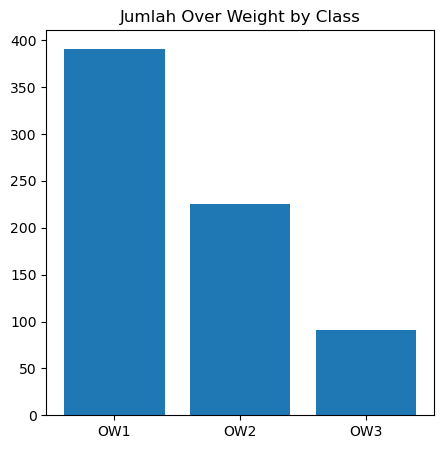

In [202]:
namaX= ['OW1','OW2','OW3']
namaY = [len(OW1),len(OW2),len(OW3) ]

plt.figure (figsize=(5,5))
plt.bar(x=namaX, height= namaY)
plt.title('Jumlah Over Weight by Class')
plt.show()

Data overweight per class menunjukkan bahwa OW 1 berada di angka terbanyak yaitu ketika BMI 30 sampai 35 disusul oleh OW kelas 2 dan OW kelas 3. perlu diketahui orang orang over weight ini merupakan orang2 yang ada ancaman terhadap kesehatannya terutama penyakit metabolik. meskipun faktor lain masih ada yang mendukung namun ini adalah salah satu skala yang biasanya dipakai orang untuk menentukan apakah mereka baik secara kesehatan atau tidak. dalam konteks asuransi ya. 

## Feature Engineering 

Kita telah selesai melakukan EDA dan ada beberapa kesimpulan seperti OW 1 lebih banyak dibandingkan kelas OW lainnya. ada korelasi antara harga dan umur. Umur terlihat sudah terdistribusi normal. Bmi dan harga sepertinya tidak berkorelasi berdasarkan scatter plot. 

disini kita akan menentukan feature feature mana yang akan kita pakai dan fiture mana yang akan kita tidak pakai dan bisa kita drop. 

kita akan menggunakan target yaitu price yang mana ( model akan menentukan berapa harga asuransi nya ketika seseorang datang ke kantor asuransi dan memberikan fitur fitur maka model akan bisa memprediksi berapa harga asuransi berdasarkan model yang telah kita lati ) 

### Split antara target dan fitur 


In [203]:
#splitting antara train dan 
X= df.drop(['charges'], axis = 1 )
y = df['charges']

In [204]:
# split antara test dan training data 
# penggunaan test size 20% 
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size= 0.2, random_state = 15)

print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (1070, 6)
Test Size (268, 6)


In [205]:
X_train.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [206]:
X_test.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [224]:
X_test.duplicated().sum()

0

In [207]:
# Get numeric and categorical column 
#numeric
num_columns = X_train.select_dtypes(include= np.number).columns.tolist()
#categoric
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print(f' numerik kolom {num_columns}')
print(f' kolom kategori {cat_columns}')

 numerik kolom ['age', 'bmi', 'children']
 kolom kategori ['sex', 'smoker', 'region']


In [208]:
# pemisahan antara kategori dan non kategori
X_train_num = X_train[num_columns]
X_test_num  = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat  = X_test[cat_columns]

### Feature Selection 

In [209]:
X_train

,age,sex,bmi,children,smoker,region
1256,51,female,36.385,3,no,northwest
147,51,female,37.730,1,no,southeast
1042,20,male,30.685,0,yes,northeast
889,57,male,33.630,1,no,northwest
650,49,female,42.680,2,no,southeast
...,...,...,...,...,...,...
1223,20,female,24.420,0,yes,southeast
667,40,female,32.775,2,yes,northwest
156,48,male,24.420,0,yes,southeast
384,44,male,22.135,2,no,northeast


In [210]:
# cek value unik dari region
X_train['region'].unique()

array(['northwest', 'southeast', 'northeast', 'southwest'], dtype=object)

Menurut saya masih ada feature yang seharusnya tidak dipakai. yaitu region dan sex. karena region hanya menunjukkan tempat dia tinggal tidak ada hubungan atau dukurngan terhadap harga. karena ini berdasarkan asumsi maka perlu dicek lebih lanjut apakah benar lokasi dari suatu asuransi itu bisa mempengaruhi harga. 
berdasarkan data dari website ini  https://www.forbes.com/advisor/health-insurance/how-much-does-health-insurance-cost/  ternyata perbedaan dari tempat mempengaruhi harga asuransi. karena kecupuan saya 
sya cenderung tidak memakai ini dan akan di drop

In [211]:
X_train_cat.drop(['sex','region'], axis = 1 , inplace = True)
X_test_cat.drop(['sex','region'], axis = 1, inplace= True) 
X_train_cat

C:\Users\asanm\AppData\Local\Temp\ipykernel_27184\2881030119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat.drop(['sex','region'], axis = 1 , inplace = True)
C:\Users\asanm\AppData\Local\Temp\ipykernel_27184\2881030119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat.drop(['sex','region'], axis = 1, inplace= True)


,smoker
1256,no
147,no
1042,yes
889,no
650,no
...,...
1223,yes
667,yes
156,yes
384,no


In [212]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.7173913 , 0.54950229, 0.6       ],
       [0.7173913 , 0.58568738, 0.2       ],
       [0.04347826, 0.39615281, 0.        ],
       ...,
       [0.65217391, 0.22760291, 0.        ],
       [0.56521739, 0.1661286 , 0.4       ],
       [0.65217391, 0.39870864, 0.6       ]])

In [213]:
X_train_cat.sample(10)

,smoker
676,no
1317,no
870,no
756,no
634,no
716,no
63,no
1184,yes
1065,no
239,no


In [214]:
encoder = OrdinalEncoder(categories= [['no','yes']])

encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]])

In [215]:
X_train_final = np.concatenate([X_train_num_scaled,X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled,X_test_cat_encoded], axis = 1)

X_train_final

array([[0.7173913 , 0.54950229, 0.6       , 0.        ],
       [0.7173913 , 0.58568738, 0.2       , 0.        ],
       [0.04347826, 0.39615281, 0.        , 1.        ],
       ...,
       [0.65217391, 0.22760291, 0.        , 1.        ],
       [0.56521739, 0.1661286 , 0.4       , 0.        ],
       [0.65217391, 0.39870864, 0.6       , 0.        ]])

In [216]:
model_lin_reg = LinearRegression() 

In [217]:
model_lin_reg.fit(X_train_final,y_train)

LinearRegression()

In [218]:
y_pred_train = model_lin_reg.predict(X_train_final)

y_pred_test = model_lin_reg.predict(X_test_final) 

y_pred_train 

array([14597.58278383, 13817.56427118, 26645.41074512, ...,
       31983.90115754,  7550.15316867, 11999.5409047 ])

In [219]:
print ('Error - Train set : ' , mean_absolute_error(y_train,y_pred_train))

Error - Train set :  4278.006938649277


In [220]:
print ('Error Test' , mean_absolute_error(y_test,y_pred_test))

Error Test 3946.614001358126


Errornya tinggi sekali model ini perlu di adjust lagi untuk mengetahui keampuhan dari model ini, mungkin perlu pemilihan fitur fitur tertentu supaya model bisa dilakukan dengan baik 

In [222]:
print ('RMSE Test' , root_mean_squared_error(y_test,y_pred_test))

RMSE Test 5476.030929183757


ketika menggunakan RMSE maka semakin ketahuan bahwa model kita kurang prediktif dan cenderung masih banyak outlier

In [223]:
print ('R square Test' , r2_score(y_test,y_pred_test))

R square Test 0.7699940556961014


rsquare sebesar 77% ini menunjukkan model bisa memprediksi dengan baik sebesar 76% namun, sisa 23% nya model belum bisa memprediksi dengan baik mungkin ini karena noise dalam data dan perlu dilakukan over dan underfitting. 

## Kesimpulan 

Model cukup baik dengan 77% mampu menebak dengan baik. namun model perlu dievaluasi lagi ke depannya. Untuk sekarang model bisa di deploy namun harus ada orang dibelakang layar untuk selalu mengecek apakah ini sudah benar atau belum karena masih ada potensi 23 % kesalaha yang dilakukan model. Ke depannya model ini perlu dievaluasi dengan penambahan atau pengurangan fiur yang lebih lanjut.